In [66]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:22pt;}
div.text_cell_render.rendered_html{font-size:18pt;}
div.text_cell_render ul li{font-size:22pt; line-height:30px;}
div.output {font-size:22pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:22pt;}
div.prompt {min-width:40px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:22pt;padding:5px;}
table.dataframe{font-size:22px;}
</style>
"""))

# 1. 데이터 생성
- 남, 여 키와 몸무게 데이터를 군집화 

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [3]:
random.randint(140, 195)

158

In [4]:
data = []
for i in range(50):
    # 여자 데이터 data추가
    data.append([random.randint(40, 70), random.randint(140, 170)])
    # 남자 데이터 data추가
    data.append([random.randint(60, 95), random.randint(160,195)])
#data

In [5]:
# 여자
# for female in data[::2]:
#     print(female, end=' ')

print('여자 : ', [ female for female in data[::2]])
print('남자 : ', [ male for male in data[1::2]])
print('===================================================')
print('여자 몸무게(x축) :', [female[0] for female in data[::2]])
print('여자 키(y축) :', [female[1] for female in data[::2]])

print('남자 몸무게(x축) :', [male[0] for male in data[1::2]])
print('남자 키(y축) :', [male[1] for male in data[1::2]])



여자 :  [[58, 169], [61, 163], [68, 152], [55, 143], [46, 168], [60, 150], [40, 151], [64, 166], [60, 162], [68, 149], [65, 150], [60, 163], [43, 168], [51, 143], [63, 150], [62, 140], [47, 141], [45, 164], [57, 151], [67, 158], [63, 153], [49, 155], [43, 165], [56, 141], [52, 163], [70, 164], [50, 140], [51, 154], [62, 170], [41, 161], [62, 143], [59, 166], [61, 163], [67, 147], [59, 164], [62, 158], [62, 140], [63, 169], [59, 142], [61, 150], [50, 165], [58, 166], [64, 147], [67, 157], [51, 168], [48, 149], [61, 154], [48, 162], [44, 161], [40, 167]]
남자 :  [[89, 192], [87, 192], [92, 176], [73, 167], [61, 170], [94, 179], [66, 168], [83, 191], [73, 174], [69, 173], [74, 160], [87, 169], [60, 169], [81, 174], [67, 166], [75, 168], [76, 178], [83, 180], [86, 187], [85, 165], [63, 187], [76, 173], [82, 188], [73, 186], [78, 161], [77, 172], [67, 161], [66, 177], [90, 163], [83, 187], [89, 161], [95, 180], [86, 177], [72, 186], [71, 163], [87, 160], [76, 195], [79, 164], [62, 194], [77, 17

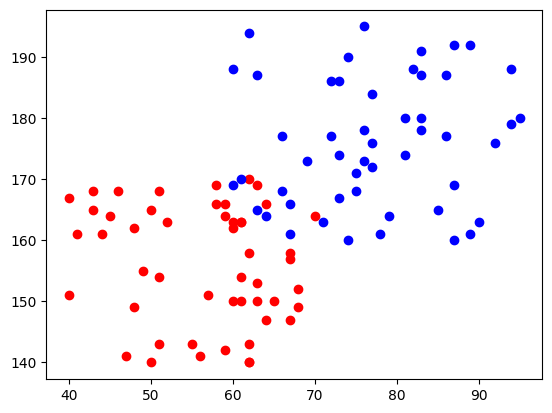

In [6]:
plt.plot([female[0] for female in data[::2]],
        [female[1] for female in data[::2]], 'o', color='r')
plt.plot([male[0] for male in data[1::2]],
        [male[1] for male in data[1::2]], 'o', color='b')
plt.show()

# 2. 군집화 로직

In [7]:
# 초기 랜덤 지점 2개
random_points = [
    [random.randint(40,95), random.randint(140,195)],
    [random.randint(40,95), random.randint(140,195)]
]
random_points

[[58, 177], [78, 149]]

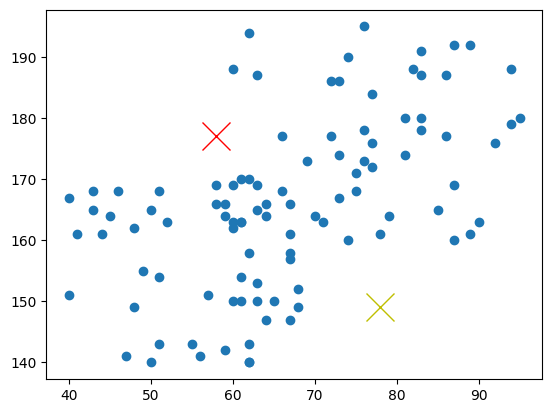

In [8]:
plt.plot([d[0] for d in data],
        [d[1] for d in data], 'o')
plt.plot(random_points[0][0],
       random_points[0][1], 'x', color = 'r', markersize=20) # 기준점(random_points[0])
plt.plot(random_points[1][0],
       random_points[1][1], 'x', color = 'y', markersize=20) # 기준점(random_points[1])

In [9]:
# 두 점 거리를 return a : [0,0]
def dist(a,b):
    return np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)
print(dist([0,0], [3,4]))
print(dist(random_points[0], data[0]))
print(dist(random_points[1], data[0]))

5.0
8.0
28.284271247461902


In [10]:
# random_points[0]에 가까운 그룹과 random_points[1]에 가까운 그룹을 분류
group0 = []
group1 = []

for d in data:
    if dist(random_points[0], d) < dist(random_points[1], d):
        group0.append(d)
    else:
        group1.append(d)
len(group0), len(group1)        
    

(62, 38)

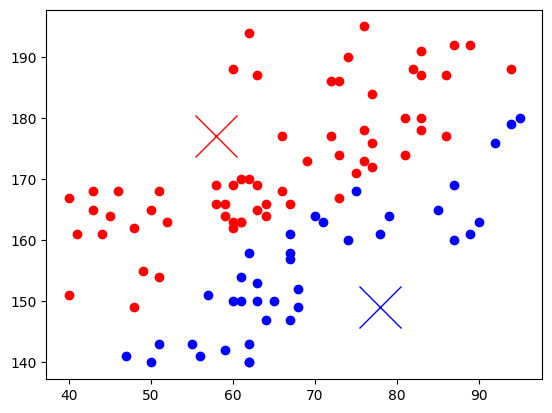

In [11]:
# group0과 group1, 기준점0, 기준점1
plt.plot([d[0] for d in group0],
        [d[1] for d in group0], 'o' , color='r')
plt.plot(random_points[0][0],
        random_points[0][1], 'x', color='r', markersize=30)

plt.plot([d[0] for d in group1],
        [d[1] for d in group1], 'o' , color='b')
plt.plot(random_points[1][0],
        random_points[1][1], 'x', color='b', markersize=30)

In [12]:
# 기준점 이동 : group0의 중심점(기준점0), group1의 중심점(기준점1)
group0_meanX = np.mean([d[0] for d in group0])
group0_meanY = np.mean([d[1] for d in group0])
random_points[0] = [group0_meanX, group0_meanY]

group1_meanX = np.mean([d[0] for d in group1])
group1_meanY = np.mean([d[1] for d in group1])
random_points[1] = [group1_meanX, group1_meanY]
random_points

[[65.25806451612904, 172.67741935483872],
 [69.21052631578948, 155.07894736842104]]

# 3. 군집화 전체 코드(for문 이용)
- 랜덤포인트 2개 지정
- 랜덤포인트 2개 시각화(x)
- forans
    * 랜덤포인트 2지점 기준으로 group0과 group1나눔
    * 랜덤포인트 출력과 시각화
    * group0의 중간점과 group1의 중간점을 랜덤포인트로 업데이트


초기 기준점 : [[40, 144], [79, 154]]
1 번째 points : [[48.45454545454545, 155.54545454545453], [71.92307692307692, 168.93589743589743]]
2 번째 points : [[53.91891891891892, 153.94594594594594], [74.3015873015873, 173.06349206349208]]
3 번째 points : [[55.73913043478261, 155.1304347826087], [76.14814814814815, 175.24074074074073]]
4 번째 points : [[56.59615384615385, 156.3653846153846], [77.77083333333333, 176.41666666666666]]
5 번째 points : [[57.0, 157.01818181818183], [78.68888888888888, 176.95555555555555]]
6 번째 points : [[57.898305084745765, 157.47457627118644], [79.51219512195122, 178.2439024390244]]
7 번째 points : [[57.898305084745765, 157.47457627118644], [79.51219512195122, 178.2439024390244]]
8 번째 points : [[57.898305084745765, 157.47457627118644], [79.51219512195122, 178.2439024390244]]
9 번째 points : [[57.898305084745765, 157.47457627118644], [79.51219512195122, 178.2439024390244]]


(140.0, 195.0)

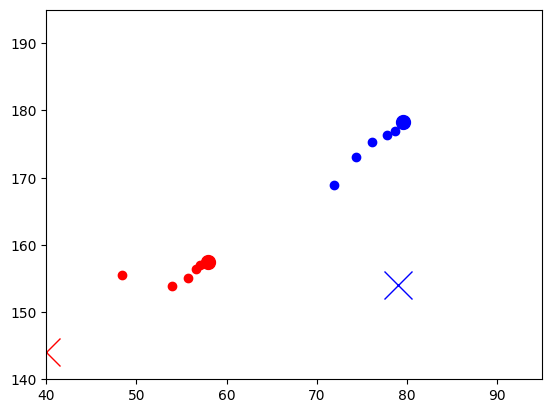

In [13]:
points = [
    [random.randint(40, 95), random.randint(140,195)],
    [random.randint(40, 95), random.randint(140,195)],
]
print('초기 기준점 :', points)
plt.plot(points[0][0], points[0][1], 'x', color='r', markersize=20)
plt.plot(points[1][0], points[1][1], 'x', color='b', markersize=20)
for i in range(1, 10):
    # 포인트 2지점 기준으로 group0과 group1나눔
    group0 = []
    group1 = []
    for d in data:
        if dist(d, points[0]) < dist(d, points[1]):
            group0.append(d)
        else:
            group1.append(d)
        
    # group0의 중간점, group1의 중간점으로 points 업데이트
    group0_mean_X = np.mean([d[0] for d in group0])
    group0_mean_Y = np.mean([d[1] for d in group0])
    points[0] = [group0_mean_X, group0_mean_Y]
    group1_mean_X = np.mean([d[0] for d in group1])
    group1_mean_Y = np.mean([d[1] for d in group1])
    points[1] = [group1_mean_X, group1_mean_Y]
    
    # 포인트 출력
    print(i, '번째 points :', points)
    plt.plot(points[0][0], points[0][1], 'o', color='r')
    plt.plot(points[1][0], points[1][1], 'o', color='b')
    
    
plt.plot(points[0][0], points[0][1], 'o', color='r', markersize=10)
plt.plot(points[1][0], points[1][1], 'o', color='b', markersize=10)
plt.xlim([40,95])
plt.ylim([140,195])

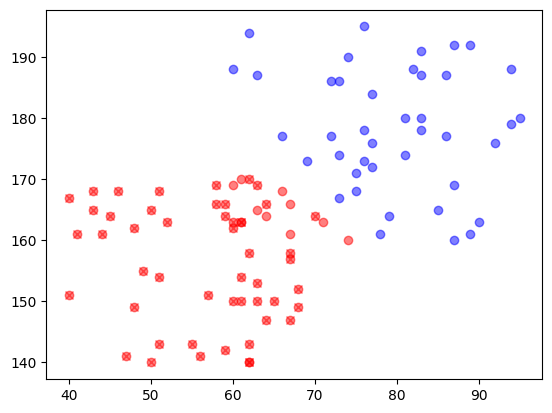

In [14]:
plt.plot([d[0] for d in group0],
        [d[1] for d in group0], 'o', color='r', alpha=0.5)
plt.plot([d[0] for d in group1],
        [d[1] for d in group1], 'o', color='b', alpha=0.5)
plt.plot([d[0] for d in data[::2]],
        [d[1] for d in data[::2]], 'x', color='r',alpha = 0.5)

# 4. api(sklearn)를 이용한 군집화
- sklearn : 머신러닝 패키지
    * 예측모델 : 분류, 회귀, 군집분석 -fit(학습), predicet(예측)
    * 변환모델 : 전처리시 사용 ex. 스케일조정 - fit(학습), transform(변환함수)

In [15]:
# 군집분석 라이브러리가 경고 메세지(joblib 충돌) 출력할 경우
import os
os.environ['OMP_NUM_THREADS'] = '1'

In [16]:
from sklearn.cluster import KMeans
data = np.array(data)
model = KMeans(n_clusters=2, # 2개 그룹으로 군집
              init='random', # 초기 기준점을 random하게
              n_init=10,     # 10번 실행
              random_state=7) # random 결과를 일관적으로 맞추기 위한 seed
model.fit(data)


,n_clusters,2
,init,'random'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,7
,copy_x,True
,algorithm,'lloyd'


In [17]:
# 기준점(중심점)
model.cluster_centers_

array([[ 57.89830508, 157.47457627],
       [ 79.51219512, 178.24390244]])

In [18]:
# 나눠진 그룹들의 인덱스
model.labels_

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1])

In [19]:
group0 = data[model.labels_==0]
group1 = data[model.labels_==1]